## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the [Cardiovascular Disease dataset-Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

We use the independent variables to predict our dependent variable.

## 3. Evaluation

If we can reach 80% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - int (days) 
2. height - int (cm)  
3. weight - float (kg)
4. gender - categorical code
    * 1: female
    * 2: male
5. ap_hi - int (mg/dl) - Systolic blood pressure
6. ap_lo - int (mg/dl) - Diastolic blood pressure
7. cholesterol
    * 1: normal
    * 2: above normal
    * 3: well above normal
8. gluc - Glucose
    * 1: normal
    * 2: above normal
    * 3: well above normal
9. smoke - binary
    * 0: no
    * 1: yes
10. alco - binary - Alcohol intake 
    * 0: no
    * 1: yes
11. active - binary - Physical activity
    * 0: no
    * 1: yes
12. cardio - binary - Presence or absence of cardiovascular disease
    * 0: no
    * 1: yes

## Preparing the tools

In [3]:
# preparing the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Step 1: Load Data

In [4]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# drop id
df.drop("id", axis=1, inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Step 2: Data Exploration (exploratory data analysis)

In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


### Check whether the data is balanced

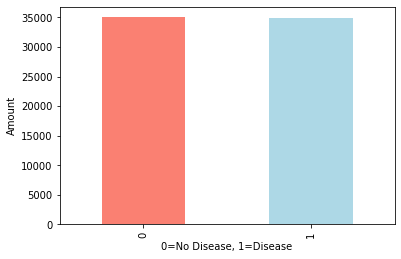

In [9]:
df["cardio"].value_counts().plot(kind="bar",
                                 color=["salmon","lightblue"]);

plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount");

### Heart Disease Frequency according to Sex

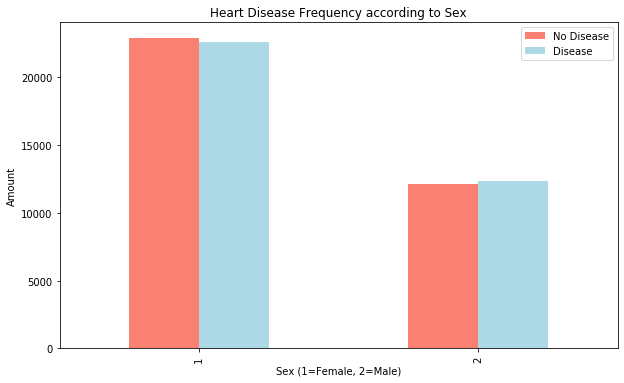

In [10]:
ax = pd.crosstab(df["gender"], df["cardio"]).plot(kind="bar",
                                                  figsize=(10,6),
                                                  color=["salmon","lightblue"]);

ax.set(title="Heart Disease Frequency according to Sex",
       ylabel="Amount",
       xlabel="Sex (1=Female, 2=Male)");
ax.legend(["No Disease","Disease"]);

### Check if there is any null or duplicated row

In [11]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 24 duplicated values in data frame


* We should delete 24 duplicated row

In [12]:
# Drop duplicated row
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [13]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


* Now, there isn't any duplicated or missing row

### Detecting Outliers

In [14]:
df_copy = df.copy(deep=True)
df_copy.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* find outliers in "height", "weight", "ap_hi", "ap_lo"
* standardize them first and compare together

In [15]:
std_list = ["height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    df_std = df_copy.copy(deep=True)
    for column in std_list:
        df_std[column] = (df_std[column]-df_std[column].mean())/df_std[column].std()
    return df_std 
df_std=standartization(df_copy)
df_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,20228,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,18857,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,17623,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,17474,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0


* melt the data to draw plot

In [16]:
df_melted = pd.melt(frame=df_std, 
                   value_vars=std_list, 
                   var_name="features", 
                   value_name="value", 
                   col_level=None)
df_melted

,features,value
0,height,0.443399
1,height,-1.018016
2,height,0.078045
3,height,0.565184
4,height,-1.018016
...,...,...
279899,ap_lo,-0.088254
279900,ap_lo,-0.035205
279901,ap_lo,-0.035205
279902,ap_lo,-0.088254


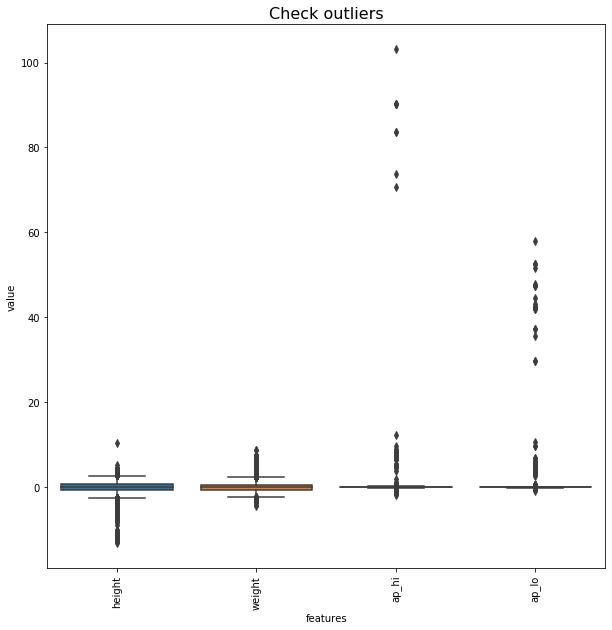

In [18]:
# Draw boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df_melted, x="features", y="value").set_title('Check outliers', fontsize=16)
plt.xticks(rotation=90);

* There is unusual outlier from "ap_hi" and "ap_lo"

In [19]:
# drop "ap_hi" outlier
df_copy["ap_hi_zscore"] = np.abs((df_copy["ap_hi"]-df["ap_hi"].mean())/df_copy["ap_hi"].std())
df_copy.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100


In [20]:
# drop "ap_lo" outlier
df_copy["ap_lo_zscore"] = np.abs((df_copy["ap_lo"]-df_copy["ap_lo"].mean())/df_copy["ap_lo"].std())
df_copy.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore,ap_lo_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181,0.088254
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577,0.035205
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658,0.141303
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496,0.017844
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100,0.194352


In [21]:
df_no_outlier = df_copy[(df_copy["ap_hi_zscore"]<3) & (df_copy["ap_lo_zscore"]<3)]
df_no_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore,ap_lo_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181,0.088254
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577,0.035205
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658,0.141303
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496,0.017844
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100,0.194352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,0.057262,0.088254
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,0.072577,0.035205
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,0.332253,0.035205
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0.040117,0.088254


In [22]:
df_no_outlier.drop("ap_hi_zscore", axis=1, inplace=True)
df_no_outlier.drop("ap_lo_zscore", axis=1, inplace=True)
df_no_outlier

/Users/michaelyu103/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Correlation Matrix

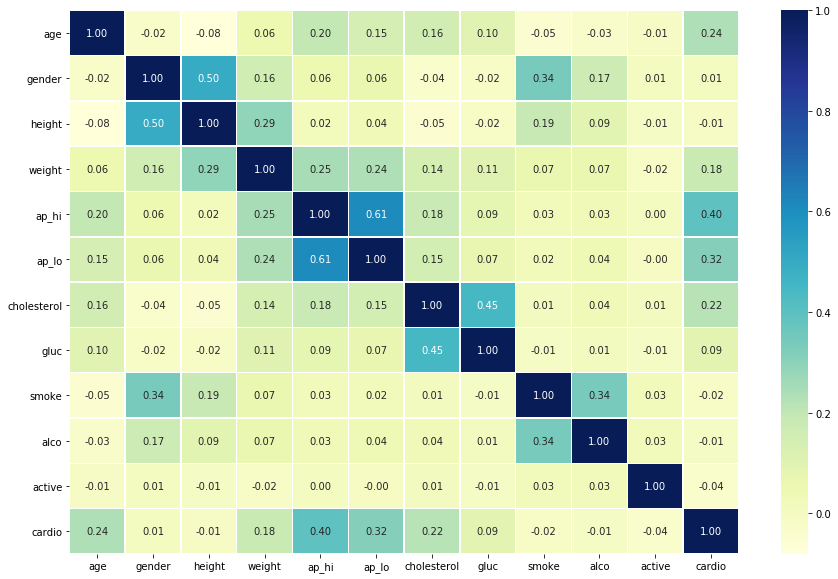

In [23]:
corr_matrix = df_no_outlier.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Step 3: Modelling

In [24]:
# split data to x and y
x = df_no_outlier.drop("cardio",axis=1)
y = df_no_outlier["cardio"]

In [25]:
# split data into train and test sets
np.random.seed(42)

# split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

### 3 models we're going to try
1. Logistics Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. XGBClassifier

In [51]:
# put 3 models in dict
models = {"Logistics Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "XGBoost" : XGBClassifier(),
          "AdaBoost" : AdaBoostClassifier()}

# create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # set random seed
    np.random.seed(42)
    # make a dict to keep the model score
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistics Regression': 0.7039426003768662,
 'KNN': 0.6819828960718944,
 'Random Forest': 0.7209015799391216,
 'XGBoost': 0.7381504565879113,
 'AdaBoost': 0.7328598347586607}

## Step 4: Evaluation (Model Comparison)

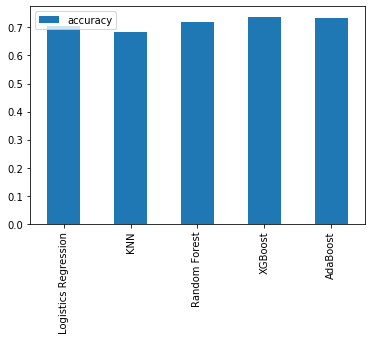

In [53]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [54]:
x = model_compare.T.sort_values(by='accuracy', ascending=True)

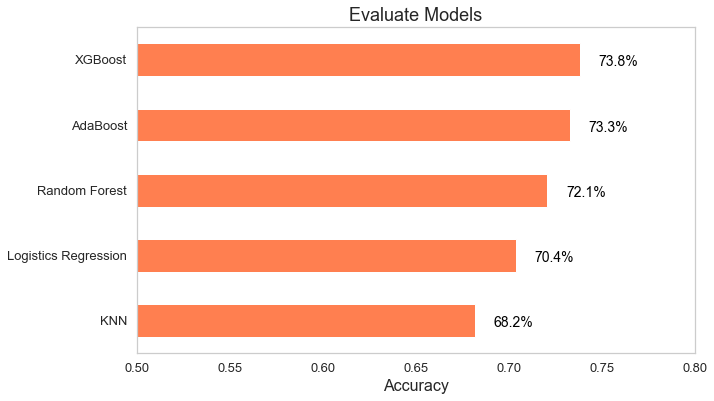

In [933]:
ax = x.plot(kind='barh', figsize=(10,6),color="coral", fontsize=13, legend=None);
ax.set_alpha(0.8)
ax.set_title("Evaluate Models", fontsize=18)
ax.set_xlabel("Accuracy", fontsize=16);
plt.xlim(0.5,0.8);
plt.grid(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.01, i.get_y()+0.15,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')

# invert for largest on top 
# ax.invert_yaxis()

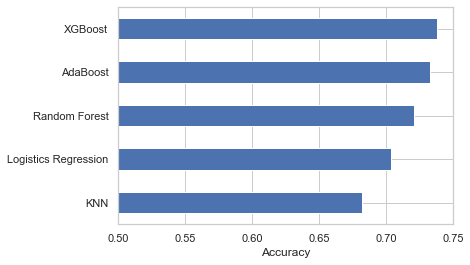

In [868]:
x.plot.barh(legend=None);
plt.xlim(0.5,0.75);
plt.xlabel("Accuracy");
# for index,value in enumerate(val):
#     plt.text(value,index,str(value))

### Hyperparameter tuning with RandomizedSearchCV
CV stands for cross-validation

* XGBoost

In [30]:
# Different XGBoost hyperparameters
XGB_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]}


In [31]:

np.random.seed(42)

#Setup grid hyperparameter search for LogisticRegression
rs_XGB = RandomizedSearchCV(XGBClassifier(),
                          param_distributions=XGB_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

# Fit grid hyperparameter search model
rs_XGB.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


In [32]:
# Evaluate the model
rs_XGB.score(x_test, y_test)

0.7431511813306276

In [33]:
rs_XGB.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

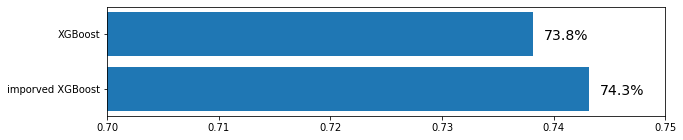

In [72]:
score_value = [rs_XGB.score(x_test, y_test),model_scores['XGBoost']]
score_index = ["imporved XGBoost","XGBoost"]
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(score_index,score_value)
# plt.text(score_value, score_index, str(score_value), fontsize=12)
plt.xlim(0.7,0.75);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.001, i.get_y()+0.3,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')

### Evaluating a classification model, beyond accuracy

* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)


In [74]:
# Make preidctions on test data
y_preds = rs_XGB.predict(x_test)

### ROC Curve and AUC Scores

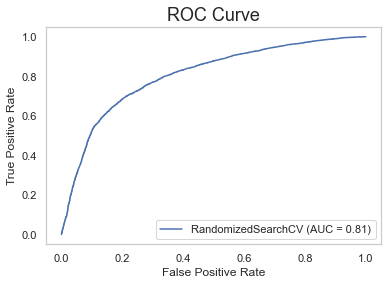

In [936]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_XGB, x_test, y_test)
plt.title("ROC Curve", fontsize=18)
plt.grid(False);

### Confusion matrix

In [76]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[5502 1497]
 [2047 4752]]


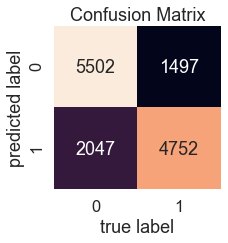

In [81]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt='g')
    
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("Confusion Matrix")
plot_conf_mat(y_test, y_preds)

### Classification report

In [665]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      6999
           1       0.76      0.70      0.73      6799

    accuracy                           0.74     13798
   macro avg       0.74      0.74      0.74     13798
weighted avg       0.74      0.74      0.74     13798



### make them more solid is calculate them using cross-validation

In [666]:
# Check best hyperparameters
rs_XGB.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [26]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = XGBClassifier(subsample=1.0,
                    min_child_weight=1,
                    max_depth=3,
                    gamma=0.5,
                    colsample_bytree=0.8)

In [669]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.73141035, 0.7414118 , 0.73429006, 0.73378271, 0.73276799])

In [670]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7347325821244017

In [671]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7557718728975317

In [672]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.6856347927954312

In [673]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.7189889493492572

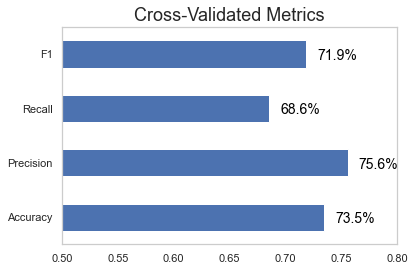

In [946]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
ax = cv_metrics.T.plot.barh(legend=False)
plt.title("Cross-Validated Metrics",fontsize=18)
plt.xlim(0.5,0.8);
plt.grid(False);
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.01, i.get_y()+0.15,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')


### Feature importance
calculate feature importance for XGBoost

In [683]:
from xgboost import plot_importance
XGB_clf = clf.fit(x_train, y_train)


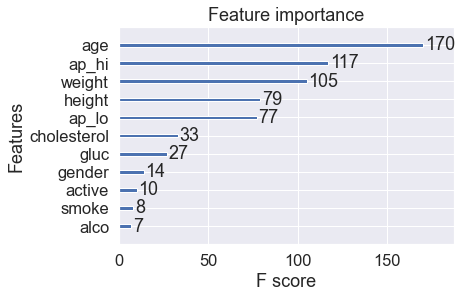

In [685]:
plot_importance(XGB_clf);

## Step 5: Save Best Model 

In [27]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(clf,'CardioDetection.pkl') 

['CardioDetection.pkl']